<a href="https://colab.research.google.com/github/kyalan/DataScienceFactory/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os, sys
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
from datetime import datetime as dt
import sklearn.metrics
import seaborn as sns

from matplotlib import pyplot as plt

In [160]:
try:
    %tensorflow_version 2.x
except:
    pass

print(tf.__version__)
print(tfds.__version__)

2.2.0-rc2
2.1.0


# Import data

In [161]:
(ds_train, ds_dev, ds_test), info = tfds.load('mnist', split=('train[:90%]', 'train[90%:]', 'test')
    , shuffle_files=True, with_info=True, as_supervised=True)
print(info)
n_train, n_dev, n_test = len(list(ds_train)), len(list(ds_dev)), len(list(ds_test))
print('no. of data for train, dev, test', n_train, n_dev, n_test)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

no. of data for train, dev, test 54000 6000 10000


Label: 4 Image Max Value: 255


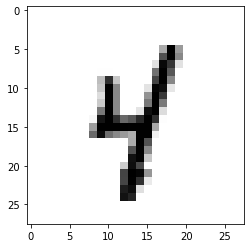

In [162]:
# check data structure
for img, label in ds_train.take(1):
    image = img.numpy().squeeze()
    label = label.numpy()

    print("Label: {}".format(label), "Image Max Value: {}".format(image.max()))
    plt.imshow(image, cmap=plt.cm.binary)
    plt.show()

# Pre-processing

In [0]:
def preprocessor(imgs, labels):
    imgs = tf.cast(imgs, tf.float32)
    imgs /= 255.0
    return imgs, labels

In [0]:
ds_train = ds_train.map(preprocessor).batch(128)
ds_dev = ds_dev.map(preprocessor).batch(128)
ds_test = ds_test.map(preprocessor)

ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [165]:
ds_dev

<DatasetV1Adapter shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>

# Modeling

In [0]:
def getModel():
    model = tf.keras.Sequential(
        [tf.keras.layers.Conv2D(16, kernel_size=3)
        , tf.keras.layers.Conv2D(32, kernel_size=3)
        , tf.keras.layers.Flatten()
        , tf.keras.layers.Dense(128, activation='relu')
        , tf.keras.layers.Dense(10, activation='softmax')
        ]
    )
    model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['acc'])
    return model

In [178]:
%%time

model = getModel()
history = model.fit(ds_train, epochs=5, validation_data=ds_dev)
print(history.history)

Epoch 1/5
422/422 [==============================] - 72s 171ms/step - loss: 0.2227 - acc: 0.9327 - val_loss: 0.1268 - val_acc: 0.9598
Epoch 2/5
422/422 [==============================] - 72s 170ms/step - loss: 0.0917 - acc: 0.9722 - val_loss: 0.1162 - val_acc: 0.9675
Epoch 3/5
422/422 [==============================] - 72s 171ms/step - loss: 0.0594 - acc: 0.9822 - val_loss: 0.1131 - val_acc: 0.9687
Epoch 4/5
422/422 [==============================] - 72s 170ms/step - loss: 0.0418 - acc: 0.9865 - val_loss: 0.1293 - val_acc: 0.9685
Epoch 5/5
422/422 [==============================] - 72s 170ms/step - loss: 0.0304 - acc: 0.9900 - val_loss: 0.1264 - val_acc: 0.9735
{'loss': [0.22265449166297913, 0.0916876569390297, 0.05941009894013405, 0.04182567447423935, 0.030361952260136604], 'acc': [0.9326851963996887, 0.9722222089767456, 0.9822407364845276, 0.9864814877510071, 0.9900370240211487], 'val_loss': [0.1268187016248703, 0.11622624844312668, 0.11311500519514084, 0.1293097585439682, 0.12638704

# Model Evaluation

In [179]:
eval = model.evaluate(ds_test.batch(128))
print('Test data: Loss = {}, Accuracy = {}'.format(eval[0], eval[1]))
print('Right Prediction: {}, Wrong Prediction: {}'.format(eval[1]*n_test, (1.0-eval[1])*n_test))

79/79 [==============================] - 5s 59ms/step - loss: 0.1085 - acc: 0.9729
Test data: Loss = 0.10847579687833786, Accuracy = 0.9728999733924866
Right Prediction: 9728.999733924866, Wrong Prediction: 271.0002660751343


In [180]:
%%time

test_labels = [x.numpy() for x in ds_test.map(lambda _, label: label)]
test_pred = model.predict(ds_test.batch(128)).argmax(axis=1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function <lambda> at 0x7fcdcc47af28>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function <lambda> at 0x7fcdcc47af28>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function <lambda> at 0x7fcdcc47af28>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
CPU times: user 11.9 s, sys: 2.2 s, total: 14.1 s
Wall time: 7.74 s


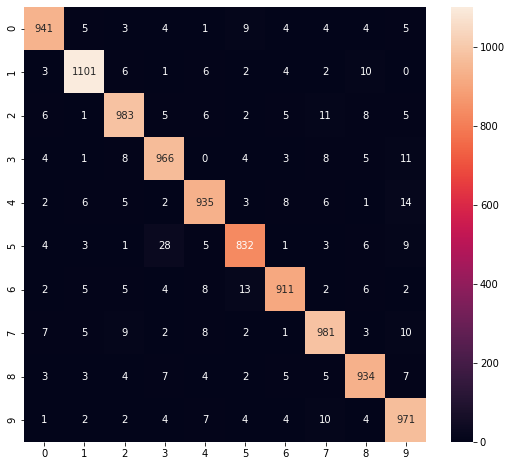

In [181]:
cm = sklearn.metrics.confusion_matrix(test_labels, test_pred)
fig = plt.figure(figsize=(9, 8))
sns.heatmap(pd.DataFrame(cm, range(10), range(10)), annot=True, fmt='d')

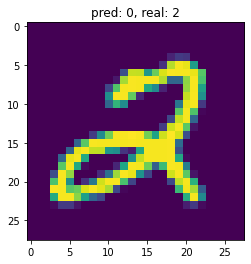

In [184]:
iimg = np.where(test_labels!=test_pred)[0][0]
for img, label in ds_test.skip(iimg).take(1):
    plt.imshow(img.numpy().squeeze() * 255.0)
    plt.title('pred: {}, real: {}'.format(test_pred[iimg],test_labels[iimg]))